# By liulu

# -----------------------------------第十一章 Numpy库-----------------------------------------------

### Numpy为什么高效
#### Numpy是由C语言编写的

1.编译型语言vs解释型语言

C语言执行时，对代码块进行整体编译，速度更快

2.连续单一性存储vs分散多变类型存储

（1）Numpy数组内的数据类型必须是统一的，如全是浮点型，而Python列表支持任意类型数据的填充

（2）Numpy数组内的数据连续存储在内存中，而Python列表的数据分散在内存中

这种存储结构，与一些更加高效的底层处理方式更加的契合

3.多线程vs线程锁

Python语言执行时有线程锁，无法实现真正的多线程运行，而C语言可以

## 1.Numpy数组的创建

### 1.1 从列表开始创建

In [1]:
import numpy as np

x = np.array([1,2,3,4,5])
print(x)

[1 2 3 4 5]


In [2]:
print(type(x))
print(x.shape)

<class 'numpy.ndarray'>
(5,)


#### 设置数组的数据类型

In [3]:
x = np.array([1,2,3,4,5],dtype="float32")
print(x)
print(type(x[0]))

[1. 2. 3. 4. 5.]
<class 'numpy.float32'>


#### 二维数组

In [6]:
x = np.array([[1,2,3],
           [4,5,6],
           [7,8,9]])
print(x)
print(x.shape)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
(3, 3)


### 1.2 从头创建数组

#### （1）创建长度为5的数组，值都为0

In [7]:
np.zeros(5, dtype=int)

array([0, 0, 0, 0, 0])

#### （2）创建一个2*4的浮点型数组，值都为1

In [8]:
np.ones((2,4),dtype=float)

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.]])

#### （3）创建一个3*5的数组，值都为8.8

In [11]:
np.full((3,5),8.8)

array([[8.8, 8.8, 8.8, 8.8, 8.8],
       [8.8, 8.8, 8.8, 8.8, 8.8],
       [8.8, 8.8, 8.8, 8.8, 8.8]])

#### （4）创建一个3*3的单位矩阵

In [12]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

#### （5）创建一个线性序列数组，从1开始，到15结束，步长为2

In [13]:
np.arange(1,15,2)

array([ 1,  3,  5,  7,  9, 11, 13])

#### （6）创建一个4个元素的数组，这四个数均匀的分配到0-1

In [14]:
np.linspace(0,1,4)

array([0.        , 0.33333333, 0.66666667, 1.        ])

#### （7）创建一个10个元素的数组，形成1-10^9的等比数列

In [15]:
np.logspace(0,9,10)

array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07,
       1.e+08, 1.e+09])

#### （8）创建一个3*3的，在0-1之间均匀分布的随机数构成的数组

In [16]:
np.random.random((3,3))

array([[0.0658687 , 0.93147799, 0.93187766],
       [0.26269831, 0.16711502, 0.34874138],
       [0.00106818, 0.37429572, 0.66968223]])

#### （9）创建一个3*3的，均值为0，标准差为1的随机数构成的数组

In [17]:
np.random.normal(0,1,(3,3))

array([[ 0.85701767,  0.15793082, -0.56798787],
       [-0.14274788, -0.41609872, -0.72987079],
       [ 0.19828679,  0.60552562, -1.23480223]])

#### （10）创建一个3*3的，在[0,10）之间随机整数构成的数组

In [18]:
np.random.randint(0,10,(3,3))

array([[2, 0, 3],
       [9, 4, 1],
       [6, 9, 4]])

#### （11）随机重排列

In [22]:
x = np.arange(1,10,1)
print(x)
print(np.random.permutation(x))   #生产新序列，不改变原序列
print(x)

[1 2 3 4 5 6 7 8 9]
[9 1 8 7 4 5 2 3 6]
[1 2 3 4 5 6 7 8 9]


In [23]:
x = np.arange(1,10,1)
print(x)
print(np.random.shuffle(x))   #改变原序列
print(x)

[1 2 3 4 5 6 7 8 9]
None
[4 1 2 3 5 6 7 9 8]


#### （12）随机采样

按指定形状采样

In [25]:
x = np.arange(10,25,dtype=float)
x

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24.])

In [27]:
np.random.choice(x,size=(4,3))

array([[19., 17., 22.],
       [13., 15., 12.],
       [13., 13., 20.],
       [11., 13., 21.]])

按概率采样

In [28]:
np.random.choice(x, size=(4,3),p=x/np.sum(x))

array([[14., 16., 18.],
       [19., 16., 23.],
       [10., 23., 22.],
       [18., 13., 20.]])

## 2.Numpy数组的性质

In [29]:
x = np.random.randint(10,size=(3,4))
x

array([[7, 7, 1, 0],
       [4, 9, 1, 2],
       [2, 0, 8, 8]])

In [30]:
x.shape

(3, 4)

In [32]:
x.ndim   #数组的维度

2

In [33]:
x.size

12

#### numpy数组的数据类型是固定的，向一个整型数组插入一个浮点值，浮点值会向下进行取整

In [34]:
x = np.random.randint(10,size=(3,4))
x

array([[8, 1, 3, 9],
       [1, 9, 3, 7],
       [5, 4, 8, 8]])

In [35]:
x[0][0] = 1.618
x

array([[1, 1, 3, 9],
       [1, 9, 3, 7],
       [5, 4, 8, 8]])

In [36]:
x[::-1,::-1]

array([[8, 8, 4, 5],
       [7, 3, 9, 1],
       [9, 3, 1, 1]])

In [37]:
x[1]

array([1, 9, 3, 7])

In [38]:
x[1,:]

array([1, 9, 3, 7])

In [41]:
x[:,2]

array([3, 3, 8])

### 2.1 数组的变形

In [43]:
x = np.random.randint(10,size=(3,4))
x

array([[9, 7, 3, 3],
       [3, 8, 7, 2],
       [6, 7, 0, 0]])

In [44]:
x.shape

(3, 4)

In [48]:
x1 = x.reshape(1,12)
x1

array([[9, 7, 3, 3, 3, 8, 7, 2, 6, 7, 0, 0]])

#### 注意：reshape返回的是视图，而非副本

In [50]:
x1[0,0]=0  #x1元素发生变化时，x也会跟着变化
x

array([[0, 7, 3, 3],
       [3, 8, 7, 2],
       [6, 7, 0, 0]])

#### 一维向量转行向量

In [53]:
x2 = x1.reshape(1,x1.shape[1])
x2

array([[0, 7, 3, 3, 3, 8, 7, 2, 6, 7, 0, 0]])

In [55]:
x3 = x1[np.newaxis,:]
x3

array([[[0, 7, 3, 3, 3, 8, 7, 2, 6, 7, 0, 0]]])

In [56]:
x1.shape

(1, 12)

#### 多维向量转一维向量

In [58]:
x = np.random.randint(0,10,(3,4))
x

array([[0, 6, 5, 7],
       [9, 3, 0, 6],
       [3, 9, 6, 2]])

In [59]:
x1 = x.flatten()
x1

array([0, 6, 5, 7, 9, 3, 0, 6, 3, 9, 6, 2])

In [60]:
x1.shape

(12,)

#### 注意：flatten返回的是副本 

In [61]:
x

array([[0, 6, 5, 7],
       [9, 3, 0, 6],
       [3, 9, 6, 2]])

In [62]:
x2 = x.ravel()
x2

array([0, 6, 5, 7, 9, 3, 0, 6, 3, 9, 6, 2])

#### ravel返回的是视图

### 2.2 数组的拼接

#### 水平拼接----非视图

In [63]:
x1 = np.array([[1,2,3],
              [4,5,6]])
x2 = np.array([[7,8,9],
              [0,1,2]])


In [64]:
x3 = np.hstack([x1,x2])
x3

array([[1, 2, 3, 7, 8, 9],
       [4, 5, 6, 0, 1, 2]])

#### 垂直方向的拼接----非视图
hstack ---->  vstack

### 2.3 数组的分裂

#### split的用法

In [66]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [67]:
x1, x2, x3 = np.split(x,[2,7])
print(x1,x2,x3)

[0 1] [2 3 4 5 6] [7 8 9]


#### hsplit的用法

In [68]:
x = np.arange(1,26).reshape(5,5)
x

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25]])

In [71]:
left, middle, right = np.hsplit(x,[2,4])  #从第二和第四列进行分割
print("left:\n",left)    #0-1列
print("middle:\n",middle)  #2-3列
print("right:\n",right)   #4列

left:
 [[ 1  2]
 [ 6  7]
 [11 12]
 [16 17]
 [21 22]]
middle:
 [[ 3  4]
 [ 8  9]
 [13 14]
 [18 19]
 [23 24]]
right:
 [[ 5]
 [10]
 [15]
 [20]
 [25]]


#### vsplit的用法与hsplit类似

## 3.Numpy四大运算

### 3.1 向量化运算

#### 1.加减乘除

In [1]:
import numpy as np


In [2]:
x1 =np.arange(1,6)
x1

array([1, 2, 3, 4, 5])

In [3]:
print(x1 + 5)

[ 6  7  8  9 10]


In [4]:
print(x1/5)

[0.2 0.4 0.6 0.8 1. ]


#### 2.取反、乘方、求整数商、取余

#### 3.绝对值、三角函数、指数、对数

In [5]:
x2 = np.array([1, -1, 2, -2, 0])
x2

array([ 1, -1,  2, -2,  0])

In [6]:
abs(x2)

array([1, 1, 2, 2, 0])

In [7]:
np.abs(x2)

array([1, 1, 2, 2, 0])

In [8]:
theta = np.linspace(0, np.pi, 3)
theta

array([0.        , 1.57079633, 3.14159265])

In [9]:
print(np.sin(theta))
print(np.cos(theta))
print(np.tan(theta))

[0.0000000e+00 1.0000000e+00 1.2246468e-16]
[ 1.000000e+00  6.123234e-17 -1.000000e+00]
[ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


In [10]:
x = [1, 0, -1]
print(np.arcsin(x))
print(np.arccos(x))
print(np.arctan(x))

[ 1.57079633  0.         -1.57079633]
[0.         1.57079633 3.14159265]
[ 0.78539816  0.         -0.78539816]


In [13]:
x3 = np.arange(3)
x3

array([0, 1, 2])

In [14]:
np.exp(x3)

array([1.        , 2.71828183, 7.3890561 ])

In [15]:
x4 = np.array([1, 2, 4, 8, 10])
print(np.log(x4))
print(np.log2(x4))
print(np.log10(x4))

[0.         0.69314718 1.38629436 2.07944154 2.30258509]
[0.         1.         2.         3.         3.32192809]
[0.         0.30103    0.60205999 0.90308999 1.        ]


#### 4.两个数组的运算

In [17]:
x1 = np.arange(1,6)
x2 = np.arange(6,11)
print(x1+x2)
print(x1*x2)
print(x1/x2)  #对应位置的元素进行相应运算

[ 7  9 11 13 15]
[ 6 14 24 36 50]
[0.16666667 0.28571429 0.375      0.44444444 0.5       ]


### 3.2 矩阵运算

In [18]:
x = np.arange(9).reshape(3,3)
x

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

矩阵的转置

In [19]:
y = x.T
y

array([[0, 3, 6],
       [1, 4, 7],
       [2, 5, 8]])

矩阵乘法

In [20]:
np.dot(x,y)

array([[  5,  14,  23],
       [ 14,  50,  86],
       [ 23,  86, 149]])

In [22]:
x*y   #这是对应元素相乘

array([[ 0,  3, 12],
       [ 3, 16, 35],
       [12, 35, 64]])

In [23]:
np.dot(y,x)

array([[45, 54, 63],
       [54, 66, 78],
       [63, 78, 93]])

### 3.3 广播运算

#### 规则

如果两个数组在维度上不匹配，那么数组的形式会沿着维度为1的维度进行扩展以匹配另一个数组的形状。

In [24]:
x1 = np.ones((3,3))
x2 = np.arange(3).reshape(1,3)
x1 + x2

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [25]:
x1 = np.arange(3)
x2 = x1.reshape(3,1)
x1+x2

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### 3.4 比较运算和掩码

#### 1.比较运算

In [27]:
x1 = np.random.randint(100,size=(10,10))
x1

array([[76, 89, 73, 70, 82, 49, 77, 39, 59, 66],
       [ 7, 47, 64, 56, 17, 78, 95, 19,  2, 44],
       [68, 44, 26, 79, 78,  8, 29, 43, 53, 23],
       [94, 42, 30, 91, 59,  6, 92, 74, 53, 75],
       [77, 50, 39, 92, 35,  4, 29, 22, 54, 99],
       [97, 84, 68, 33, 85, 28, 42,  1,  0,  7],
       [86, 85, 55, 78, 43, 84, 58, 15, 83, 29],
       [51, 55,  7, 77, 63, 63,  8, 45, 62, 47],
       [98, 81, 86, 83, 92, 79, 53, 42, 84, 80],
       [15,  6,  0, 30, 20, 82, 80, 32, 51, 17]])

In [28]:
x1 > 50

array([[ True,  True,  True,  True,  True, False,  True, False,  True,
         True],
       [False, False,  True,  True, False,  True,  True, False, False,
        False],
       [ True, False, False,  True,  True, False, False, False,  True,
        False],
       [ True, False, False,  True,  True, False,  True,  True,  True,
         True],
       [ True, False, False,  True, False, False, False, False,  True,
         True],
       [ True,  True,  True, False,  True, False, False, False, False,
        False],
       [ True,  True,  True,  True, False,  True,  True, False,  True,
        False],
       [ True,  True, False,  True,  True,  True, False, False,  True,
        False],
       [ True,  True,  True,  True,  True,  True,  True, False,  True,
         True],
       [False, False, False, False, False,  True,  True, False,  True,
        False]])

#### 2.操作布尔数组

In [30]:
x2 = np.random.randint(10,size=(3,4))
x2

array([[4, 3, 2, 0],
       [9, 9, 2, 3],
       [1, 5, 5, 6]])

In [31]:
np.sum(x2>5)

3

In [32]:
np.all(x2>0)

False

In [33]:
np.any(x==6)

True

In [37]:
np.all(x2<8,axis=0) #0是列，1是行

array([False, False,  True,  True])

#### 3.将布尔数组作为掩码

In [38]:
x2

array([[4, 3, 2, 0],
       [9, 9, 2, 3],
       [1, 5, 5, 6]])

In [39]:
x2 > 5

array([[False, False, False, False],
       [ True,  True, False, False],
       [False, False, False,  True]])

In [40]:
x2[x2>5]

array([9, 9, 6])

### 3.5 花哨的索引

#### 1.一维数组

In [42]:
x = np.random.randint(10,size=10)
x

array([9, 1, 3, 4, 2, 6, 4, 4, 2, 0])

In [43]:
ind = [2,6,9]
x[ind]

array([3, 4, 0])

注意：结果的形状与索引数组ind一致

In [45]:
ind = np.array([[1,0],
        [2,3]])
x[ind]

array([[1, 9],
       [3, 4]])

#### 2.多维数组

In [46]:
x = np.arange(12).reshape(3,4)
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [47]:
row = np.array([0,1,2])
col = np.array([1,3,0])
x[row,col]

array([1, 7, 8])

In [48]:
row[:,np.newaxis]  #变换为列向量


array([[0],
       [1],
       [2]])

In [50]:
x[row[:,np.newaxis],col]    #广播机制

array([[ 1,  3,  0],
       [ 5,  7,  4],
       [ 9, 11,  8]])

## 4.其他Numpy通用函数

### 4.1 数值排序

In [55]:
x = np.random.randint(20,40, size=10)
x

array([22, 22, 21, 29, 26, 34, 28, 36, 33, 20])

In [56]:
np.sort(x)   #产生新的排序数组,不改变原来的x


array([20, 21, 22, 22, 26, 28, 29, 33, 34, 36])

In [57]:
x

array([22, 22, 21, 29, 26, 34, 28, 36, 33, 20])

In [60]:
x.sort()  #替换原数组
x

array([20, 21, 22, 22, 26, 28, 29, 33, 34, 36])

获得排序索引

In [61]:
x = np.random.randint(20,40, size=10)
x

array([25, 23, 32, 29, 28, 20, 30, 38, 25, 25])

In [62]:
i = np.argsort(x)
i  #获得元素在排序前数组中的位置索引

array([5, 1, 0, 8, 9, 4, 3, 6, 2, 7], dtype=int64)

### 4.2 最大值最小值

np.max(x)  np.min(x)  np.argmax(x)  np.argmin(x)

### 4.3 数值求和、求积

In [ ]:
x.sum()      np.sum(x)    按行求和：np.sum(x,axis=1)    按列求和：np.sum(x,axis=0)

In [ ]:
求积：x.prod()   np.prod(x)

### 4.4 中位数、均值、方差、标准差

In [67]:
x = np.random.normal(0,1,size=10000)


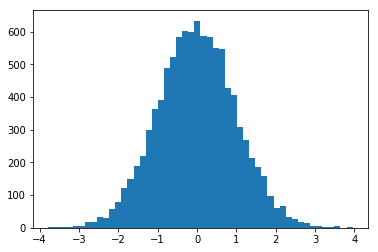

In [68]:
import matplotlib.pyplot as plt

plt.hist(x, bins=50)
plt.show()

In [69]:
np.median(x)  #中位数

-0.014510412887287506

In [70]:
np.mean(x)#均值

-0.009866398020561981

In [71]:
x.mean()

-0.009866398020561981

In [72]:
np.var(x)  #方差

0.9844583120778471

In [73]:
np.std(x)  #标准差

0.9921987261017055